# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #Importing Libraries
import seaborn as sns

# Import the Dataset

In [2]:
df = pd.read_csv("dataset.csv",low_memory = False) #Imported Dataset

# 1.)Feature Engineering and Exploratory Data Analysis

In [3]:
df.rename(columns = {'class':'OrbitType'}, inplace = True) #Renaming column class to avoid confusion with keyword
  

In [4]:
pd.set_option("display.max_columns", None) #Changing settings to display all columns
df.head(5) #Show first 5 rows in the dataset

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,OrbitType,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
df.shape #Show the number of rows and columns 

(958524, 45)

In [6]:
df = df.drop(['id','full_name','pdes','spkid','name','prefix','orbit_id'], axis=1) #Dropping textual columns that dont convey any meaningful information

In [7]:
df.shape #Checking updated no of columns

(958524, 38)

In [8]:
df.info()  #Give the count of no of non empty rows in each column and nature of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             958520 non-null  object 
 1   pha             938603 non-null  object 
 2   H               952261 non-null  float64
 3   diameter        136209 non-null  float64
 4   albedo          135103 non-null  float64
 5   diameter_sigma  136081 non-null  float64
 6   epoch           958524 non-null  float64
 7   epoch_mjd       958524 non-null  int64  
 8   epoch_cal       958524 non-null  float64
 9   equinox         958524 non-null  object 
 10  e               958524 non-null  float64
 11  a               958524 non-null  float64
 12  q               958524 non-null  float64
 13  i               958524 non-null  float64
 14  om              958524 non-null  float64
 15  w               958524 non-null  float64
 16  ma              958523 non-null  float64
 17  ad        

In [9]:
df.describe() #Describing the properties of numerical features 

,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [10]:
df.describe(include = 'object') #describing the properties of categorical features

,neo,pha,equinox,OrbitType
count,958520,938603,958524,958524
unique,2,2,1,13
top,N,N,J2000,MBA
freq,935625,936537,958524,855954


In [11]:
df = df.drop(['equinox'], axis=1) #Dropping Equinox since it has only 1 unique value (J200) that doesnt contribute anything to our model

In [12]:
df.shape #Checking updated no of columns

(958524, 37)

In [13]:
(df['OrbitType'].value_counts()) #Seeing the types of classes in our data and no of rows corresponding to each class

OrbitType
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: count, dtype: int64

In [14]:
(df['OrbitType'].value_counts())/len(df) * 100 #Checking the distribution of class type in %ge

OrbitType
MBA    89.299172
OMB     2.958194
IMB     2.124099
MCA     1.949351
APO     1.323598
AMO     0.882294
TJN     0.857673
TNO     0.361806
ATE     0.180382
CEN     0.052789
AST     0.007929
IEO     0.002295
HYA     0.000417
Name: count, dtype: float64

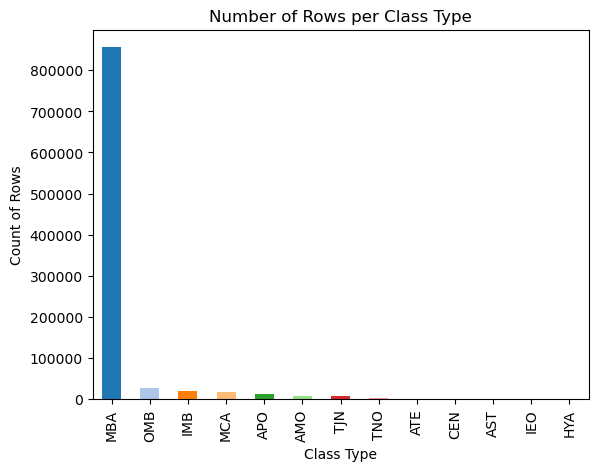

In [15]:
#Plotting a Bar Chart to see a diagramatic presentation

colors = plt.cm.tab20.colors[:13]
(df['OrbitType'].value_counts()).plot(kind="bar",color=colors)
plt.xlabel('Class Type')
plt.ylabel('Count of Rows')
plt.title('Number of Rows per Class Type')
plt.show()  

In [16]:
classes_to_remove = ['HYA', 'IEO', 'AST']
# Filtering the DataFrame to select rows where the class is not in the specified classes_to_remove list
df = df[~df['OrbitType'].isin(classes_to_remove)]

In [17]:
df.shape #Checking updated no of rows

(958422, 37)

In [18]:
df['OrbitType'].value_counts() #Checking Updated no of classes and their distributions

OrbitType
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
Name: count, dtype: int64

# Handling Missng/Null Values

In [19]:
df.isnull().sum()  #We calculate the no of rows with null values in each column

neo                    0
pha                19920
H                   6245
diameter          822221
albedo            823326
diameter_sigma    822349
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     0
n                      0
tp                     0
tp_cal                 0
per                    0
per_y                  0
moid               19920
moid_ld              127
sigma_e            19921
sigma_a            19921
sigma_q            19921
sigma_i            19921
sigma_om           19921
sigma_w            19921
sigma_ma           19921
sigma_ad           19921
sigma_n            19921
sigma_tp           19921
sigma_per          19921
OrbitType              0
rms                    2
dtype: int64

plt.figure(figsize = (30,30))  #plotting heatmap to see distribution of missing values
sns.heatmap(df.isnull())

In [20]:
df.isnull().sum()/df.shape[0] *100 #Converting into percentage of Missing values

neo                0.000000
pha                2.078416
H                  0.651592
diameter          85.789037
albedo            85.904330
diameter_sigma    85.802392
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000000
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000000
per_y              0.000000
moid               2.078416
moid_ld            0.013251
sigma_e            2.078521
sigma_a            2.078521
sigma_q            2.078521
sigma_i            2.078521
sigma_om           2.078521
sigma_w            2.078521
sigma_ma           2.078521
sigma_ad           2.078521
sigma_n            2.078521
sigma_tp           2.078521
sigma_per          2.078521
OrbitType          0

In [21]:
columns_with_nan = ['neo', 'pha', 'H','ma','ad','per','per_y','moid','moid_ld','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_w','rms','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per']
# Filtering the DataFrame to select rows where 'classtype' is 'MBA' and drop NaN values from specified columns
df = df[(df['OrbitType'] != 'MBA') | df[columns_with_nan].notnull().all(axis=1)]

In [22]:
df.isnull().sum()/df.shape[0] *100 #Checking Updated Percentage of missing values

neo                0.000000
pha                0.149286
H                  0.156558
diameter          85.846492
albedo            85.936000
diameter_sigma    85.860180
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000107
ad                 0.000000
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000000
per_y              0.000000
moid               0.149286
moid_ld            0.005240
sigma_e            0.149393
sigma_a            0.149393
sigma_q            0.149393
sigma_i            0.149393
sigma_om           0.149393
sigma_w            0.149393
sigma_ma           0.149393
sigma_ad           0.149393
sigma_n            0.149393
sigma_tp           0.149393
sigma_per          0.149393
OrbitType          0

In [23]:
df.shape #Checking Updated no of rows after removal

(935118, 37)

In [24]:
(df['OrbitType'].value_counts()) #Checking updated class distribution

OrbitType
MBA    832650
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
Name: count, dtype: int64

In [25]:
df = df.drop(['diameter', 'albedo', 'diameter_sigma'], axis=1) #Dropping features with more than 50% Missing values

In [26]:
df.shape #Checking Updated no of columns

(935118, 34)

In [27]:
df.info() #Checking Updated info

<class 'pandas.core.frame.DataFrame'>
Index: 935118 entries, 0 to 958523
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        935118 non-null  object 
 1   pha        933722 non-null  object 
 2   H          933654 non-null  float64
 3   epoch      935118 non-null  float64
 4   epoch_mjd  935118 non-null  int64  
 5   epoch_cal  935118 non-null  float64
 6   e          935118 non-null  float64
 7   a          935118 non-null  float64
 8   q          935118 non-null  float64
 9   i          935118 non-null  float64
 10  om         935118 non-null  float64
 11  w          935118 non-null  float64
 12  ma         935117 non-null  float64
 13  ad         935118 non-null  float64
 14  n          935118 non-null  float64
 15  tp         935118 non-null  float64
 16  tp_cal     935118 non-null  float64
 17  per        935118 non-null  float64
 18  per_y      935118 non-null  float64
 19  moid       933722 non-null  

 # Imputing Null Values

In [28]:
a = df.select_dtypes('number')
# Select string and object columns.
b = df.select_dtypes('object')

# Fill numeric columns with mean.
df[a.columns] = a.fillna(a.mean())
# Fill object columns with mode.
df[b.columns] = b.fillna(b.agg(lambda x: x.mode().values[0]))

In [29]:
df.info() #Checking final info after imputing null values with mean and mode

<class 'pandas.core.frame.DataFrame'>
Index: 935118 entries, 0 to 958523
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        935118 non-null  object 
 1   pha        935118 non-null  object 
 2   H          935118 non-null  float64
 3   epoch      935118 non-null  float64
 4   epoch_mjd  935118 non-null  int64  
 5   epoch_cal  935118 non-null  float64
 6   e          935118 non-null  float64
 7   a          935118 non-null  float64
 8   q          935118 non-null  float64
 9   i          935118 non-null  float64
 10  om         935118 non-null  float64
 11  w          935118 non-null  float64
 12  ma         935118 non-null  float64
 13  ad         935118 non-null  float64
 14  n          935118 non-null  float64
 15  tp         935118 non-null  float64
 16  tp_cal     935118 non-null  float64
 17  per        935118 non-null  float64
 18  per_y      935118 non-null  float64
 19  moid       935118 non-null  

# Encoding Of Categorical Features

In [30]:
df['neo'].replace(['N', 'Y'],
                        [0, 1], inplace=True) #Encoding  with 0-1

In [31]:
df['pha'].replace(['N', 'Y'],
                        [0, 1], inplace=True) #Encoding  with 0-1

# Feature Selection


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935118 entries, 0 to 958523
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        935118 non-null  int64  
 1   pha        935118 non-null  int64  
 2   H          935118 non-null  float64
 3   epoch      935118 non-null  float64
 4   epoch_mjd  935118 non-null  int64  
 5   epoch_cal  935118 non-null  float64
 6   e          935118 non-null  float64
 7   a          935118 non-null  float64
 8   q          935118 non-null  float64
 9   i          935118 non-null  float64
 10  om         935118 non-null  float64
 11  w          935118 non-null  float64
 12  ma         935118 non-null  float64
 13  ad         935118 non-null  float64
 14  n          935118 non-null  float64
 15  tp         935118 non-null  float64
 16  tp_cal     935118 non-null  float64
 17  per        935118 non-null  float64
 18  per_y      935118 non-null  float64
 19  moid       935118 non-null  

FS using Mutual Information for Classification

In [34]:
from sklearn.model_selection import  train_test_split #Importing libraries


In [36]:
X = df.drop('OrbitType', axis=1)
y = df['OrbitType']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size=0.3,random_state = 0)

In [ ]:
from sklearn.feature_selection import mutual_info_classif  #using Mutual information classifier for our feature rankings
mutualinfo= mutual_info_classif(X_train,y_train)
mutualinfo

In [ ]:
mutualinfo = pd.Series(mutualinfo)
mutualinfo.index = X_train.columns
mutualinfo.sort_values(ascending = False)

In [ ]:
mutualinfo.sort_values(ascending = False).plot.bar(figsize=(30,20)) #Visualising the information

In [ ]:
from sklearn.feature_selection import SelectKBest #Importing Library for selecting top 8 features

In [ ]:
Select_Features= SelectKBest(mutual_info_classif,k=8)
Select_Features.fit(X_train,y_train)
X_train.columns[Select_Features.get_support()]

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Model Training and Evaluation 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
RF1 = RandomForestClassifier()

In [ ]:
RF1.fit(X_train,y_train)

In [ ]:
y_pred = RF1.predict(X_test)

In [ ]:
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)

In [ ]:
print(classification_report(y_test,y_pred))